In [1]:
import os, sys
sys.path += [os.path.dirname('../scripts/')]

import torch
from visualizer import CLS_tokens, plot_tokens_category
from transformers import ViTForImageClassification, ViTFeatureExtractor

/home/rkn/.local/share/virtualenvs/AffectNet-experiments-e17pgDV_/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/rkn/.local/share/virtualenvs/AffectNet-experiments-e17pgDV_/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/rk

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224-in21k')
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224-in21k',
                                                  num_labels=64,
                                                  problem_type='regression',)

/home/rkn/.local/share/virtualenvs/AffectNet-experiments-e17pgDV_/lib/python3.10/site-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(
Some weights of the model checkpoint at google/vit-base-patch16-224-in21k were not used when initializing ViTForImageClassification: ['pooler.dense.bias', 'pooler.dense.weight']
- This IS expected if you are initializing ViTForImageClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ViTForImageClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ViTForIm

In [4]:
from torchaffectnet import AffectNetDataset
from torchvision.transforms import Compose, Resize, ToTensor, Normalize

normalize = Normalize(mean=feature_extractor.image_mean, std=feature_extractor.image_std)

transform = Compose([
    Resize(tuple(feature_extractor.size.values())),
    ToTensor(),
    normalize,
])

dataset = AffectNetDataset('../../Affectnet/validation.csv',
                           '../../Affectnet/Manually_Annotated/Manually_Annotated_Images/',
                           transform=transform)

In [5]:
features, labels = CLS_tokens(model.to(device), dataset, device)

100%|██████████| 4000/4000 [03:09<00:00, 21.14it/s]


plotting tokens...


4000it [00:11, 347.96it/s]


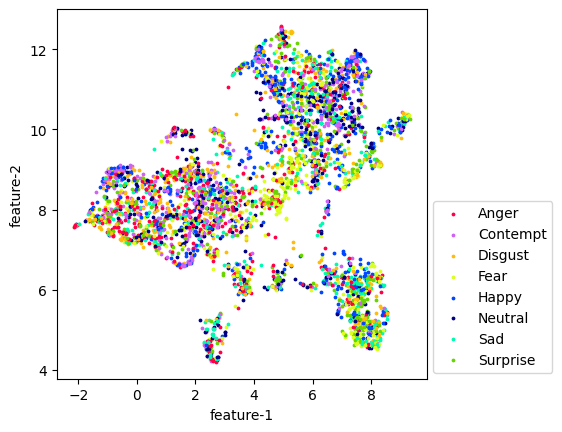

In [6]:
from utils import exclude_id

id2label, label2id = exclude_id([8,9,10])
fig, legend = plot_tokens_category(features, labels, 20, id2label, 0, method='umap')

In [7]:
fig.savefig(os.path.join(
                '../outputs/non-train', 'emotion'+f'umap'+'.svg'), bbox_inches='tight', bbox_extra_artists=[
                    legend])
fig.savefig(os.path.join(
                '../outputs/non-train', 'emotion'+f'umap'+'.png'), bbox_inches='tight', bbox_extra_artists=[
                    legend])